In [17]:
import pandas as pd
import re
import string
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer


In [18]:
df = pd.read_csv('Sample Data.csv')
df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/theworkingboat/status/1460...,2021-11-16 09:54:20+00:00,⭐ THANK YOU ⭐\n\nOur popular #Sunday night pub...,⭐ THANK YOU ⭐\n\nOur popular #Sunday night pub...,1460546769096425476,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['Sunday', 'TheWorkingBoat', 'Falmouth']",NaN
1,snscrape.modules.twitter.Tweet,https://twitter.com/WeHoLove/status/1460523193...,2021-11-16 08:20:39+00:00,Ahhh big stars in #gayweho #redressparty #mick...,Ahhh big stars in #gayweho #redressparty #mick...,1460523193395933188,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,3,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['gayweho', 'redressparty', 'mickysweho', 'Sun...",NaN
2,snscrape.modules.twitter.Tweet,https://twitter.com/bdsrated/status/1460518587...,2021-11-16 08:02:21+00:00,Without God\nour week would be\nSINDAY\nMOURND...,Without God\nour week would be\nSINDAY\nMOURND...,1460518587639025673,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['CHURCH', 'SUNDAY', 'BDMS', 'SOMEWHEREINCAVIT...",NaN
3,snscrape.modules.twitter.Tweet,https://twitter.com/maggietranquila/status/146...,2021-11-16 07:34:44+00:00,#awesome #Attitude #Motivation #commitment #Su...,#awesome #Attitude #Motivation #commitment #Su...,1460511638856114185,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['awesome', 'Attitude', 'Motivation', 'commitm...",NaN
4,snscrape.modules.twitter.Tweet,https://twitter.com/BadalonaCC/status/14605071...,2021-11-16 07:16:46+00:00,@BadalonaCC #Sunday training with @omaree02\n\...,@BadalonaCC #Sunday training with @omaree02\n\...,1460507115982925826,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,4,...,"[{'_type': 'snscrape.modules.twitter.Video', '...",NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,['Sunday'],NaN


In [19]:
df.tail()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
5637,snscrape.modules.twitter.Tweet,https://twitter.com/BruddaZen/status/145748830...,2021-11-07 23:21:04+00:00,"I can open up space in my heart, within my bei...","I can open up space in my heart, within my bei...",1457488300273405952,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sundayvibes', 'SundayFunday', 'SundayThought...",NaN
5638,snscrape.modules.twitter.Tweet,https://twitter.com/YarnsWool/status/145748824...,2021-11-07 23:20:51+00:00,Linda caminata (8 km) por salud y placer. #ope...,Linda caminata (8 km) por salud y placer. #ope...,1457488248528277504,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,NaN,NaN,NaN,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...","['openair', 'healthylife', 'walk', 'Sunday', '...",NaN
5639,snscrape.modules.twitter.Tweet,https://twitter.com/BringonFoxFever/status/145...,2021-11-07 23:20:26+00:00,@realkarlbeattie @Yfielding @marymbeattie #MyH...,@realkarlbeattie @Yfielding @marymbeattie #MyH...,1457488143544946692,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,0,3,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['MyHeroes', 'Sunday', 'animaloftheday']",NaN
5640,snscrape.modules.twitter.Tweet,https://twitter.com/Skye3411/status/1457487967...,2021-11-07 23:19:44+00:00,I have about 20 White Tea Rose bushes in my fr...,I have about 20 White Tea Rose bushes in my fr...,1457487967669211145,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Flowers', 'GardeningTwitter', 'Sunday']",NaN
5641,snscrape.modules.twitter.Tweet,https://twitter.com/mileslong4real/status/1457...,2021-11-07 23:18:48+00:00,Last Boat ride of the summer before we store t...,Last Boat ride of the summer before we store t...,1457487730200305668,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,9,...,"[{'_type': 'snscrape.modules.twitter.Video', '...",NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['sundayfunday', 'sunday', 'livingmybestlife']",NaN


In [20]:
print(df.shape)

(5642, 28)


In [21]:
# Define a function to clean the text data
STOPWORDS = set(stopwords.words('english'))
english_punctuations = string.punctuation
punctuations_list = english_punctuations

def clean_text(text):
    text = text.lower()  # convert to lowercase
    text = re.sub(r'(.)1+', r'1', text)  # remove repeating characters
    text = re.sub('((www.[^s]+)|(https?://[^s]+))', ' ', text)  # remove URLs
    text = re.sub('[0-9]+', ' ', text)  # remove numbers
    text = ''.join([c for c in text if c not in punctuations_list])  # remove punctuations
    text = " ".join([word for word in str(text).split() if word not in STOPWORDS])  # remove stopwords
    text = ' '.join([word for word in text.split() if len(word) > 2])  # remove short words
    return text

df['content'] = df['content'].apply(clean_text)
df['content'].head()

0    thank popular sunday night pub quizzes huge su...
1    ahhh big stars gayweho redressparty mickysweho...
2    without god week would sinday mournday tearsda...
3    awesome attitude motivation commitment sunday ...
4    badalonacc sunday training omaree cricketpuntc...
Name: content, dtype: object

In [22]:
# Tokenize the text using the TweetTokenizer
tt = TweetTokenizer()
df['content'] = df['content'].apply(tt.tokenize)
print(df['content'].head())

# Apply stemming and lemmatization
st = nltk.PorterStemmer()
lm = nltk.WordNetLemmatizer()

def apply_stemming(data):
    text = [st.stem(word) for word in data]
    return text

def apply_lemmatization(data):
    text = [lm.lemmatize(word) for word in data]
    return text

df['content'] = df['content'].apply(apply_stemming)
df['content'] = df['content'].apply(apply_lemmatization)
df['content'].head()

0    [thank, popular, sunday, night, pub, quizzes, ...
1    [ahhh, big, stars, gayweho, redressparty, mick...
2    [without, god, week, would, sinday, mournday, ...
3    [awesome, attitude, motivation, commitment, su...
4    [badalonacc, sunday, training, omaree, cricket...
Name: content, dtype: object


0    [thank, popular, sunday, night, pub, quizz, hu...
1    [ahhh, big, star, gayweho, redressparti, micky...
2    [without, god, week, would, sinday, mournday, ...
3    [awesom, attitud, motiv, commit, sunday, time,...
4    [badalonacc, sunday, train, omare, cricketpunt...
Name: content, dtype: object

In [24]:
# Define functions to compute sentiment analysis
def get_subjectivity(text):
    return TextBlob(" ".join(text)).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(" ".join(text)).sentiment.polarity

def get_analysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

# Compute the sentiment analysis and add new columns to the DataFrame
df['subjectivity'] = df['content'].apply(get_subjectivity)
df['polarity'] = df['content'].apply(get_polarity)
df['analysis'] = df['polarity'].apply(get_analysis)

# Create new DataFrames for positive, negative, and neutral tweets
df_positive = df[df['analysis'] == 'positive']
df_negative = df[df['analysis'] == 'negative']
df_neutral = df[df['analysis'] == 'neutral']

df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,subjectivity,polarity,analysis
0,snscrape.modules.twitter.Tweet,https://twitter.com/theworkingboat/status/1460...,2021-11-16 09:54:20+00:00,"[thank, popular, sunday, night, pub, quizz, hu...",⭐ THANK YOU ⭐\n\nOur popular #Sunday night pub...,1460546769096425476,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['Sunday', 'TheWorkingBoat', 'Falmouth']",NaN,0.510,0.420,positive
1,snscrape.modules.twitter.Tweet,https://twitter.com/WeHoLove/status/1460523193...,2021-11-16 08:20:39+00:00,"[ahhh, big, star, gayweho, redressparti, micky...",Ahhh big stars in #gayweho #redressparty #mick...,1460523193395933188,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,3,...,NaN,NaN,NaN,NaN,NaN,"['gayweho', 'redressparty', 'mickysweho', 'Sun...",NaN,0.100,0.000,neutral
2,snscrape.modules.twitter.Tweet,https://twitter.com/bdsrated/status/1460518587...,2021-11-16 08:02:21+00:00,"[without, god, week, would, sinday, mournday, ...",Without God\nour week would be\nSINDAY\nMOURND...,1460518587639025673,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['CHURCH', 'SUNDAY', 'BDMS', 'SOMEWHEREINCAVIT...",NaN,0.625,-0.375,negative
3,snscrape.modules.twitter.Tweet,https://twitter.com/maggietranquila/status/146...,2021-11-16 07:34:44+00:00,"[awesom, attitud, motiv, commit, sunday, time,...",#awesome #Attitude #Motivation #commitment #Su...,1460511638856114185,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,"['awesome', 'Attitude', 'Motivation', 'commitm...",NaN,0.000,0.000,neutral
4,snscrape.modules.twitter.Tweet,https://twitter.com/BadalonaCC/status/14605071...,2021-11-16 07:16:46+00:00,"[badalonacc, sunday, train, omare, cricketpunt...",@BadalonaCC #Sunday training with @omaree02\n\...,1460507115982925826,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,4,...,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,['Sunday'],NaN,0.000,0.000,neutral


In [26]:
# Now we print just two columns which names are polarity and analysis
df[['polarity', 'analysis']]

,polarity,analysis
0,0.420,positive
1,0.000,neutral
2,-0.375,negative
3,0.000,neutral
4,0.000,neutral
...,...,...
5637,0.250,positive
5638,0.000,neutral
5639,0.000,neutral
5640,0.400,positive


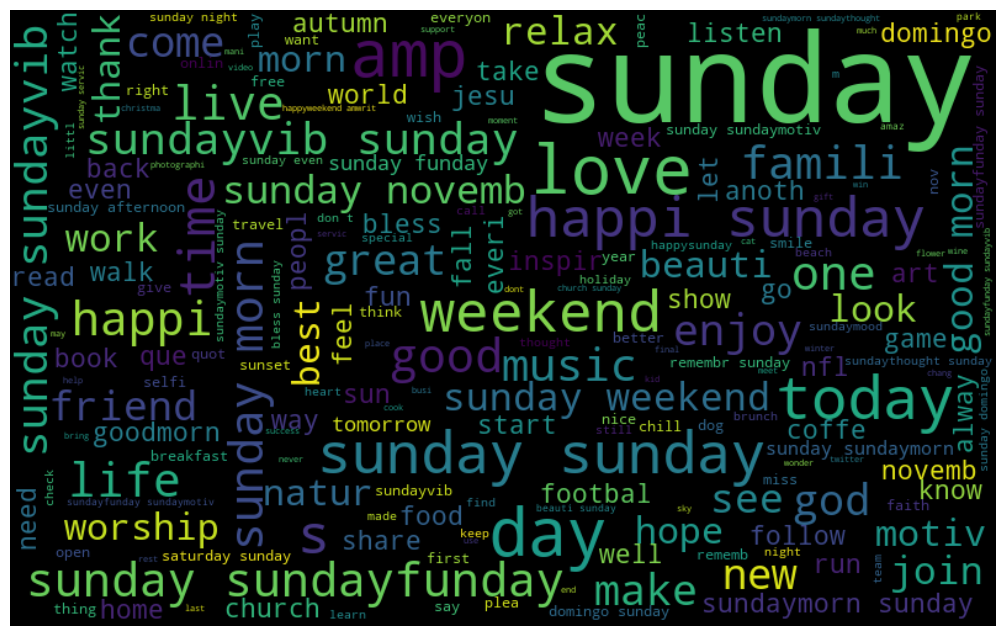

In [27]:
# Convert tweets to strings
df['content'] = df['content'].apply(lambda x: ' '.join(map(str, x)))

# Create a single string of all the tweets
all_words = " ".join(sent for sent in df['content'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# Display word cloud
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Positive Review

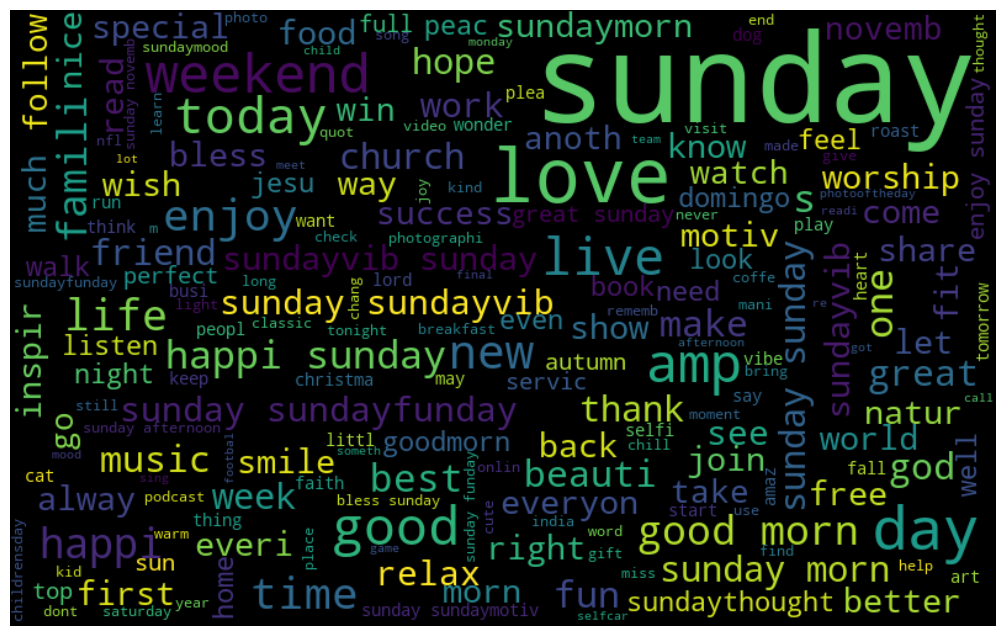

In [28]:
# Create a single string of all the positive tweets
all_pos_words = " ".join(" ".join(sent) for sent in df_positive['content'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_pos_words)

# Display word cloud
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

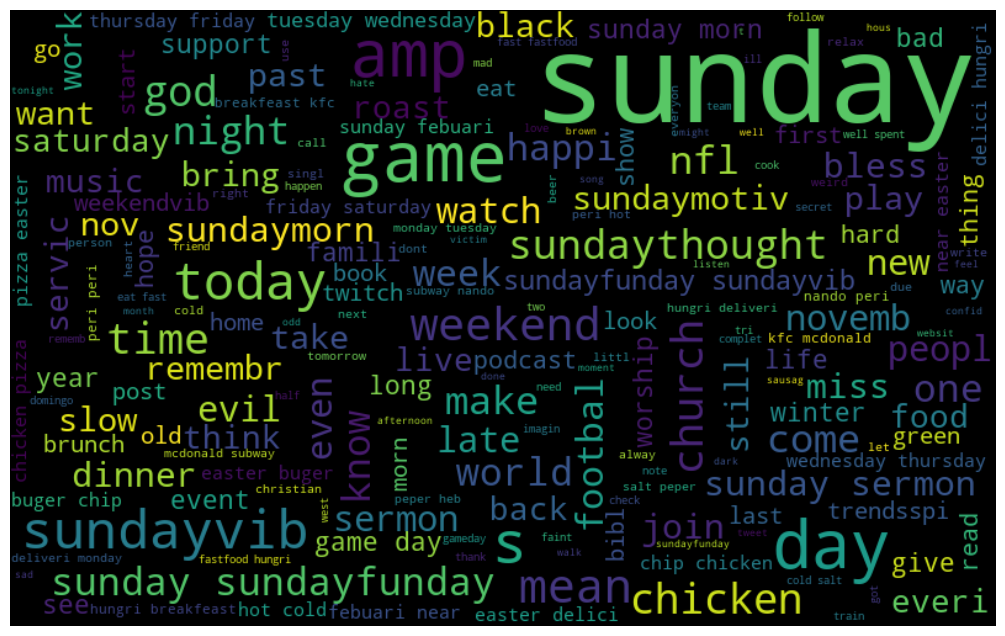

In [29]:
#Negative
# Create a single string of all the negative tweets
all_neg_words = " ".join(" ".join(sent) for sent in df_negative['content'])

# Generate word cloud with fixed random state
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_neg_words)

# Display word cloud
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


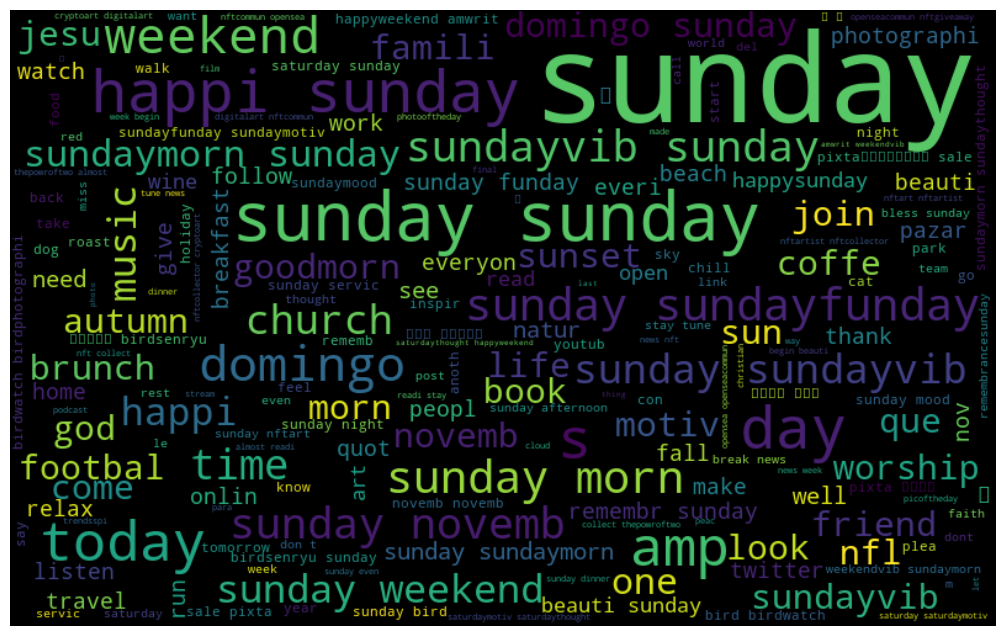

In [30]:
# Visualizing all neutral tweets
all_neu_words = " ".join(" ".join(sent) for sent in df_neutral['content'])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_neu_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

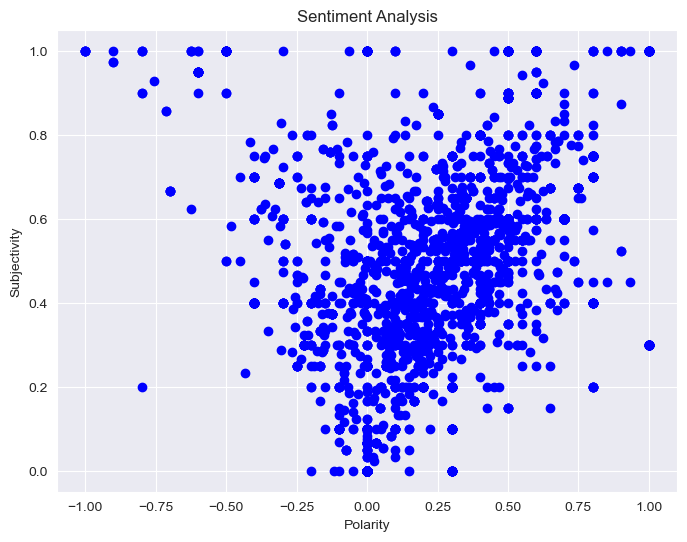

In [31]:
# Plot scatter plot of polarity and subjectivity scores
plt.figure(figsize=(8,6))
plt.scatter(df['polarity'], df['subjectivity'], color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [32]:
# Get the percentage of positive tweets
print("Positive tweets",round((df_positive.shape[0]/df.shape[0])*100,1),"%")
# Get the percentage of negative tweets
print("Negative tweets",round((df_negative.shape[0]/df.shape[0])*100,1),"%")
# Get the percentage of neutral tweets
print("Neutral tweets",round((df_neutral.shape[0]/df.shape[0])*100,1),"%")

Positive tweets 34.7 %
Negative tweets 7.3 %
Neutral tweets 58.0 %


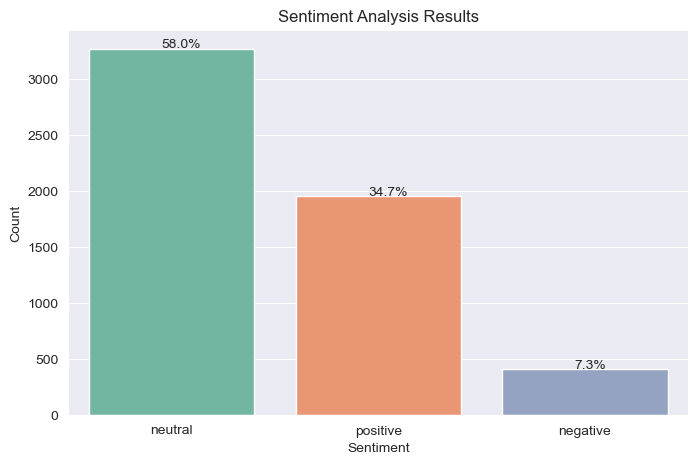

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of tweets with each sentiment
sentiment_counts = df['analysis'].value_counts()

# Set up the plot
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))

# Create a bar graph of the sentiment analysis results
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')

# Add percentage values to the bars
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

# Set the chart title and axis labels
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.show()
